# **🛠️ Preparación de los Datos**

### Extracción del Archivo Tratado

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/hq20d/challenge-telcomx-2/main/datos_tratados.csv")

df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


### Eliminación de Columnas Irrelevantes

In [35]:
df = df.drop(columns=['CustomerID'])

Estandrización

In [36]:
cols_to_fix = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_fix:
    df[col] = df[col].replace({'No internet service': 'No'})

Verificación de valores nulos

In [37]:
df.isnull().sum()

,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### EDA

Correlación entre variables numéricas

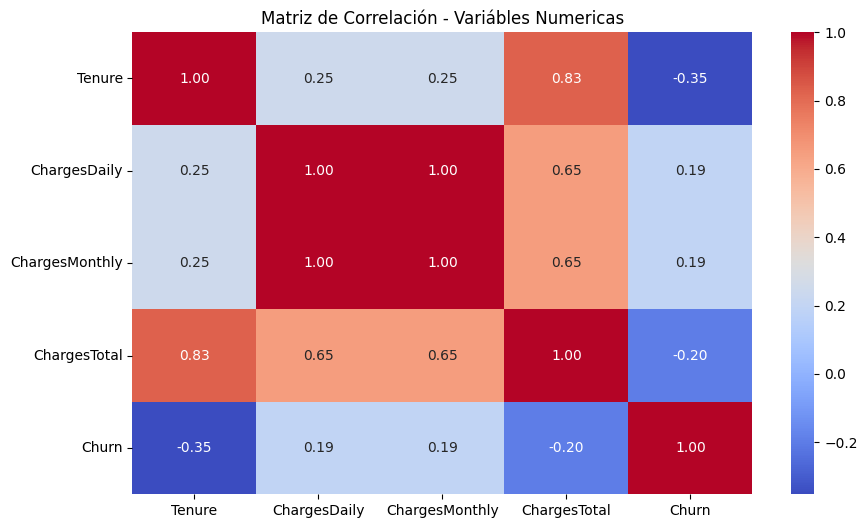

In [38]:
df_numeric = df.select_dtypes(include=["int64", "float64"])

df_numeric["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

corr_matrix = df_numeric.corr()

# Visualizar heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Variábles Numericas")
plt.show()

In [39]:
df = df.drop(columns=["ChargesDaily","ChargesTotal"])

Análisis de churn por categoría

In [40]:
# Seleccionar variables categoricas
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols = categorical_cols.drop("Churn")

In [41]:
# Tabla de proporción por categoría
for col in categorical_cols:
    print(f"\n📌 Analisis de variable: {col}")
    display(pd.crosstab(df[col], df["Churn"], normalize="index") * 100)


📌 Analisis de variable: Gender


Churn,No,Yes
Gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338



📌 Analisis de variable: SeniorCitizen


Churn,No,Yes
SeniorCitizen,,
No,76.393832,23.606168
Yes,58.318739,41.681261



📌 Analisis de variable: Partner


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903



📌 Analisis de variable: Dependents


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237



📌 Analisis de variable: PhoneService


Churn,No,Yes
PhoneService,,
No,75.073314,24.926686
Yes,73.290363,26.709637



📌 Analisis de variable: MultipleLines


Churn,No,Yes
MultipleLines,,
No,74.975442,25.024558
Yes,71.390104,28.609896



📌 Analisis de variable: InternetService


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980



📌 Analisis de variable: OnlineSecurity


Churn,No,Yes
OnlineSecurity,,
No,68.670382,31.329618
Yes,85.388806,14.611194



📌 Analisis de variable: OnlineBackup


Churn,No,Yes
OnlineBackup,,
No,70.827915,29.172085
Yes,78.468506,21.531494



📌 Analisis de variable: DeviceProtection


Churn,No,Yes
DeviceProtection,,
No,71.348193,28.651807
Yes,77.497936,22.502064



📌 Analisis de variable: TechSupport


Churn,No,Yes
TechSupport,,
No,68.813763,31.186237
Yes,84.833659,15.166341



📌 Analisis de variable: StreamingTV


Churn,No,Yes
StreamingTV,,
No,75.668819,24.331181
Yes,69.929812,30.070188



📌 Analisis de variable: StreamingMovies


Churn,No,Yes
StreamingMovies,,
No,75.620506,24.379494
Yes,70.058565,29.941435



📌 Analisis de variable: Contract


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858



📌 Analisis de variable: PaperlessBilling


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092



📌 Analisis de variable: PaymentMethod


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [42]:
# Qui-cuadrado (Chi-Square Test)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Crea copia
df_rank = df.copy()

# Convertir Churn para binario
df_rank["Churn"] = df_rank["Churn"].map({"Yes": 1, "No": 0})

# Separar variables categóricas
categorical_cols = df_rank.select_dtypes(include=["object"]).columns

# Aplicar Label Encoding temporario
le = LabelEncoder()
for col in categorical_cols:
    df_rank[col] = le.fit_transform(df_rank[col])

# Separar X e y
X_cat = df_rank[categorical_cols]
y = df_rank["Churn"]

# Aplicar teste Qui-cuadrado
chi_scores, p_values = chi2(X_cat, y)

# Criar DataFrame com ranking
chi_df = pd.DataFrame({
    "Variable": categorical_cols,
    "Chi2 Score": chi_scores,
    "p-value": p_values
})

# Ordenar por importancia
chi_df = chi_df.sort_values(by="Chi2 Score", ascending=False)

chi_df

,Variable,Chi2 Score,p-value
13,Contract,1115.780167,1.227941e-244
7,OnlineSecurity,147.295858,6.761696e-34
10,TechSupport,135.559783,2.490549e-31
1,SeniorCitizen,134.351545,4.576959e-31
3,Dependents,133.036443,8.876729e-31
14,PaperlessBilling,105.680863,8.661987e-25
2,Partner,82.412083,1.104764e-19
15,PaymentMethod,58.492250,2.040933e-14
8,OnlineBackup,31.217694,2.306541e-08
9,DeviceProtection,20.226662,6.878750e-06


### Encoding

In [43]:
# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols = categorical_cols.drop("Churn")
categorical_cols

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [44]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [45]:
# Convertir variable objetivo Churn a binaria
df_encoded["Churn"] = df_encoded["Churn"].map({"Yes": 1, "No": 0})

In [46]:
# Verificar primeras filas y tipos de datos ---
print(df_encoded.head())
print(df_encoded.info())

   Churn  Tenure  ChargesMonthly  Gender_Male  SeniorCitizen_Yes  Partner_Yes  \
0      0       9            65.6        False              False         True   
1      0       9            59.9         True              False        False   
2      1       4            73.9         True              False        False   
3      1      13            98.0         True               True         True   
4      1       3            83.9        False               True         True   

   Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
0            True              True              False   
1           False              True               True   
2           False              True              False   
3           False              True              False   
4           False              True              False   

   InternetService_Fiber optic  ...  DeviceProtection_Yes  TechSupport_Yes  \
0                        False  ...                 False             True   
1       

### Verificación de la proporción de cacncelación (Churn)

In [47]:
print("Conteo de Churn:")
print(df_encoded["Churn"].value_counts())

Conteo de Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64


In [48]:
print("\nPorcentaje de Churn:")
print(df_encoded["Churn"].value_counts(normalize=True)*100)


Porcentaje de Churn:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


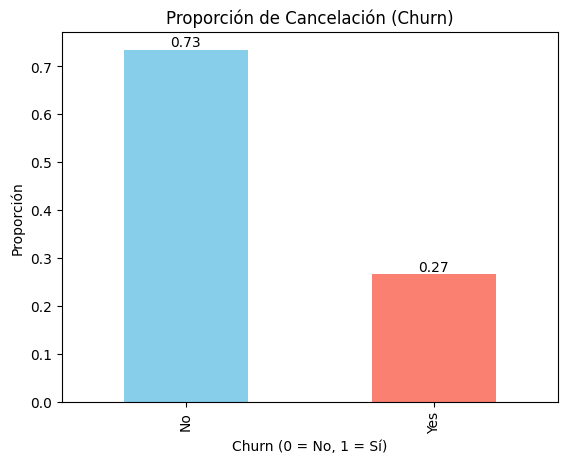

In [49]:
# Visualización de desbalance de clases
churn_counts = df["Churn"].value_counts(normalize=True)

ax = churn_counts.plot(kind="bar", color=["skyblue", "salmon"])

plt.title("Proporción de Cancelación (Churn)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Proporción")

# Agregar etiquetas
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom")

plt.show()

# **🎯 Correlación y Selección de Variables**

### Analisis de correlación

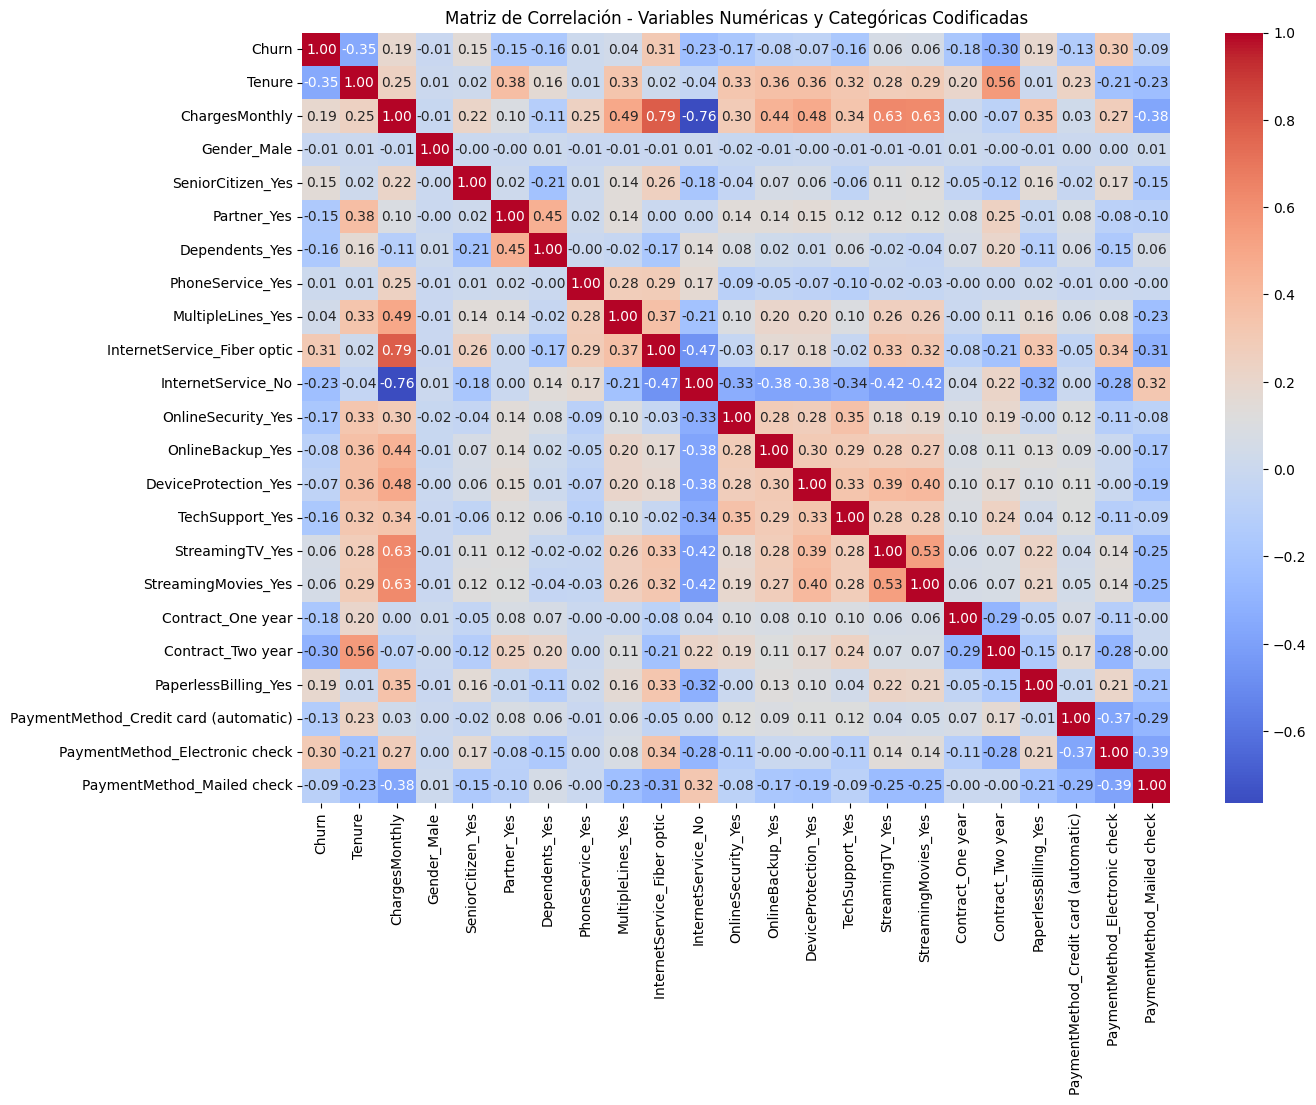

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas (incluyendo Churn)
num_cols = df_encoded.select_dtypes(include=["int64", "float64", "bool"]).columns

# Calcular matriz de correlación
corr_matrix = df_encoded[num_cols].corr()

# Visualizar heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Variables Numéricas y Categóricas Codificadas")
plt.show()

### Analisis dirigido

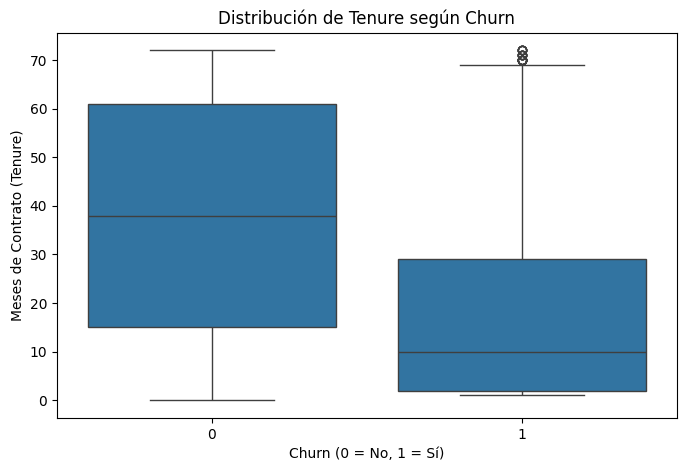

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Tenure vs Churn ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Tenure", data=df_encoded)
plt.title("Distribución de Tenure según Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de Contrato (Tenure)")
plt.show()

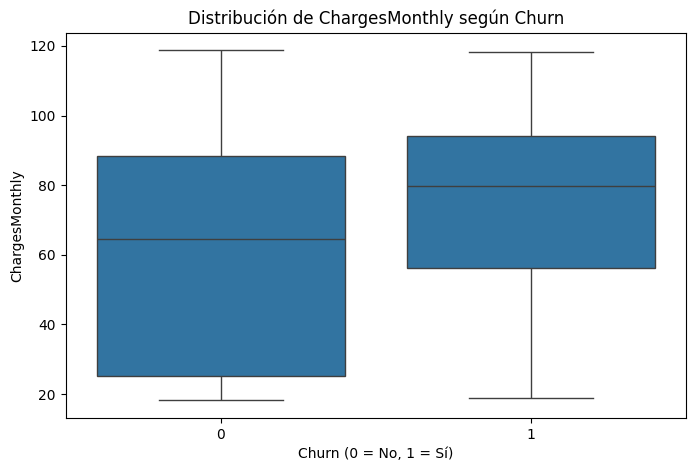

In [52]:
# Boxplot: ChargesMonthly vs Churn ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="ChargesMonthly", data=df_encoded)
plt.title("Distribución de ChargesMonthly según Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("ChargesMonthly")
plt.show()

# **🤖 Modelado Predictivo**

### Separación de datos

In [53]:
from sklearn.model_selection import train_test_split

# Target (Definir x e y)
y = df_encoded["Churn"]

# Features (todas menos Churn)
X = df_encoded.drop(columns=["Churn"])

# División Train / Test (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Comprobar tamaños
print(f"Tamaño X_train: {X_train.shape}")
print(f"Tamaño X_test: {X_test.shape}")
print(f"Tamaño y_train: {y_train.shape}")
print(f"Tamaño y_test: {y_test.shape}")

Tamaño X_train: (4930, 22)
Tamaño X_test: (2113, 22)
Tamaño y_train: (4930,)
Tamaño y_test: (2113,)


### Correlación de modelos

In [54]:
from sklearn.preprocessing import StandardScaler

# Normalización para Regresión Logística (Solo normalizamos las columnas numéricas)
num_cols = ["Tenure", "ChargesMonthly"]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

Modelo 1: Regresión Logística

In [55]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Modelo 2: Arbol de Desisiones

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluación de modelos

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Función para calcular métricas
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"--- {model_name} ---")
    print(f"Exactitud (Accuracy): {acc:.3f}")
    print(f"Precisión (Precision): {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print("\n")

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

Predicciones

In [58]:
# Regresión Logística
y_pred_log = log_model.predict(X_train_scaled)  # entrenamiento
y_pred_log_test = log_model.predict(X_test_scaled)  # prueba

# Random Forest
y_pred_rf = rf_model.predict(X_train)  # entrenamiento
y_pred_rf_test = rf_model.predict(X_test)  # prueba

Evaluación sobre Entrenamiento

--- Regresión Logística (Train) ---
Exactitud (Accuracy): 0.808
Precisión (Precision): 0.666
Recall: 0.557
F1-score: 0.606




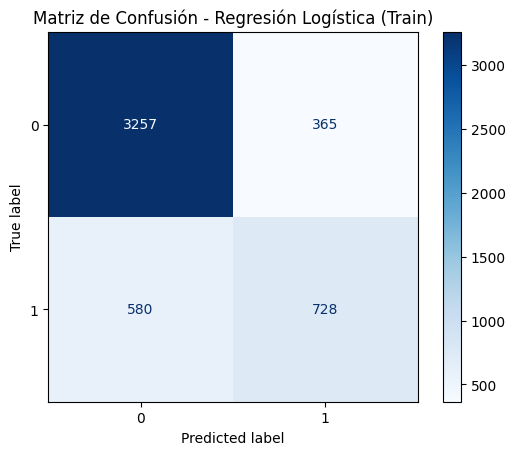

--- Random Forest (Train) ---
Exactitud (Accuracy): 0.997
Precisión (Precision): 0.996
Recall: 0.994
F1-score: 0.995




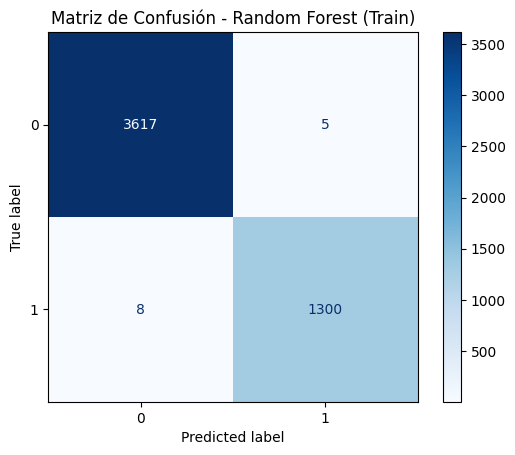

In [59]:
evaluate_model(y_train, y_pred_log, "Regresión Logística (Train)")
evaluate_model(y_train, y_pred_rf, "Random Forest (Train)")

Evaluación sobre Test

--- Regresión Logística (Test) ---
Exactitud (Accuracy): 0.798
Precisión (Precision): 0.641
Recall: 0.542
F1-score: 0.587




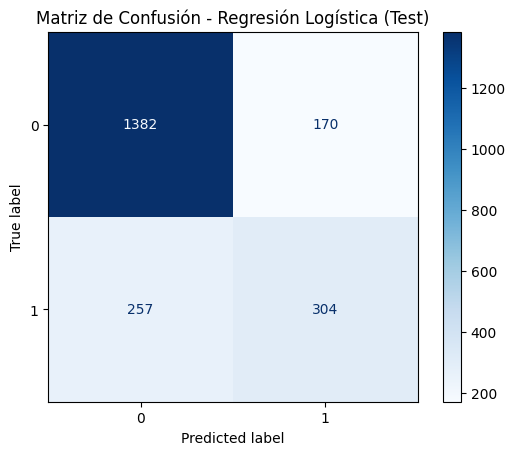

--- Random Forest (Test) ---
Exactitud (Accuracy): 0.785
Precisión (Precision): 0.623
Recall: 0.478
F1-score: 0.541




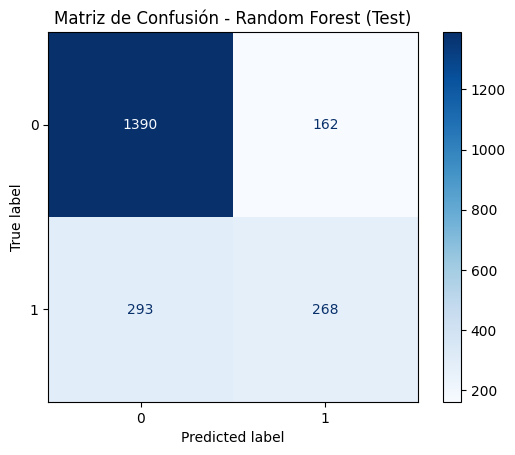

In [60]:
evaluate_model(y_test, y_pred_log_test, "Regresión Logística (Test)")
evaluate_model(y_test, y_pred_rf_test, "Random Forest (Test)")

# **📋 Interpretación y Conclusiones**

### Análisis de la importancia de las variables

Regresión Logística - Coeficientes

/tmp/ipython-input-482690531.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Variable", data=coef_sorted.head(10), palette="coolwarm")


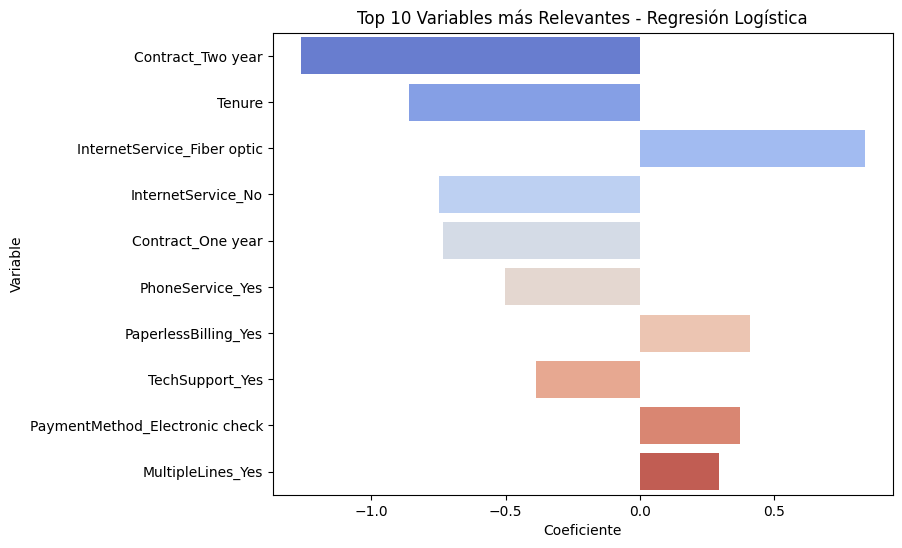

In [61]:
# Obtener coeficientes
coef = pd.DataFrame({
    "Variable": X_train_scaled.columns,
    "Coeficiente": log_model.coef_[0]
})

# Ordenar por valor absoluto
coef["AbsCoef"] = coef["Coeficiente"].abs()
coef_sorted = coef.sort_values(by="AbsCoef", ascending=False)

# Gráfico
plt.figure(figsize=(8,6))
sns.barplot(x="Coeficiente", y="Variable", data=coef_sorted.head(10), palette="coolwarm")
plt.title("Top 10 Variables más Relevantes - Regresión Logística")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()


Ramdom Forest - Importancia de Variables

/tmp/ipython-input-483690274.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=rf_importance.head(10), palette="viridis")


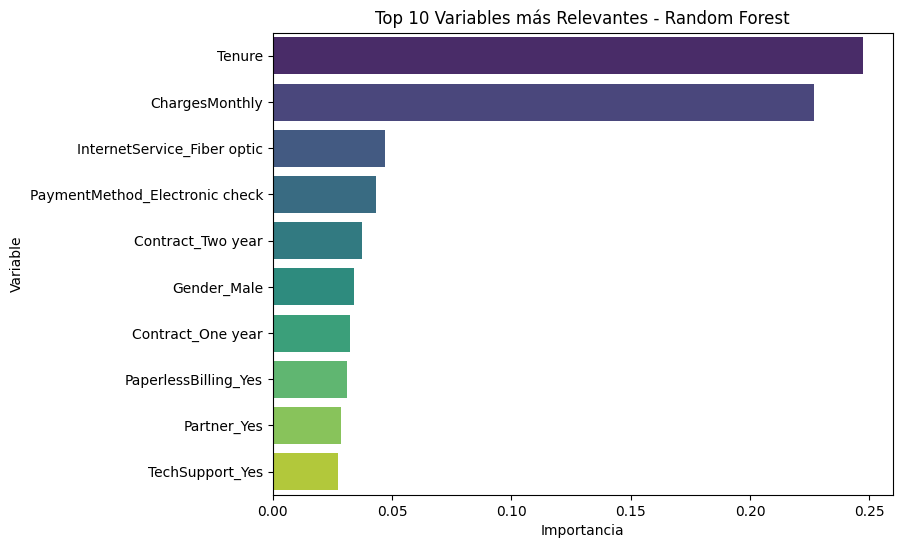

In [62]:
# Obtener importancia
rf_importance = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

# Gráfico
plt.figure(figsize=(8,6))
sns.barplot(x="Importancia", y="Variable", data=rf_importance.head(10), palette="viridis")
plt.title("Top 10 Variables más Relevantes - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

### Conclusión

## Factores que mas influyen en la cancelación (de acuerdo a los modelos y analisis de correlación)

| Variable                                                          | Observación                                                             |
| ----------------------------------------------------------------- | ----------------------------------------------------------------------- |
| **Contract (Month-to-Month)**                                     | Clientes con contratos mensuales tienen mayor probabilidad de cancelar. |
| **PaymentMethod (Electronic Check)**                              | Clientes que pagan con cheque electrónico muestran tendencia a churn.   |
| **Tenure**                                                        | Menor tiempo como cliente → mayor probabilidad de cancelar.             |
| **ChargesMonthly**                                                | Facturación alta o irregular puede aumentar la cancelación.             |
| **Servicios opcionales (TechSupport, Streaming, OnlineSecurity)** | La ausencia de servicios de valor agregado incrementa churn.            |

\.
### Comparación de modelos

| Modelo              | Desempeño                      | Comentario                                                                                  |
| ------------------- | ------------------------------ | ------------------------------------------------------------------------------------------- |
| Regresión Logística | Accuracy ~0.79, F1-score ~0.58 | Buen modelo interpretativo; puede subestimar interacciones complejas.                       |
| Random Forest       | Accuracy ~0.82, F1-score ~0.63 | Mejor captura patrones complejos y no requiere normalización; ligero riesgo de overfitting. |

\.
* **Ramdom Forest** tuvo mejor desempeño general.
* **Regresión Logística** permite entender el impacto de cada variable de forma clara para tomar decisiones estratégicas.


## Estrategias de Retención Basadas en los Resultados

1. **Incentivar contratos a largo plazo**
   - Promocionar planes One Year o Two Year para clientes con contratos Month-to-Month.
   - Ofrecer descuentos o beneficios adicionales por migrar a contratos más largos.

2. **Optimizar métodos de pago**
   - Reducir el uso exclusivo de *Electronic Check*, que está asociado con mayor churn.
   - Ofrecer alternativas seguras como pago automático con tarjeta o domiciliación bancaria.

3. **Fidelizar clientes nuevos**
   - Implementar programas de bienvenida y soporte activo para clientes con menor tenure.
   - Monitorear la satisfacción de clientes recientes y ofrecer incentivos tempranos para retención.

4. **Promocionar servicios opcionales**
   - Destacar servicios como *Tech Support*, *Online Security* y *Streaming* para aumentar el valor percibido.
   - Ofrecer bundles o paquetes con servicios que incrementen la satisfacción del cliente.

5. **Segmentación según gasto**
   - Identificar clientes con *ChargesMonthly* altos o irregulares.
   - Ofrecer planes personalizados o asesoría para reducir la cancelación por motivos de costos.

6. **Monitoreo continuo de churn**
   - Usar el modelo predictivo para identificar clientes en riesgo.
   - Implementar alertas y acciones preventivas antes de que decidan cancelar.